In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

# Выведите результаты работы библиотечной модели - в численном и в графическом виде.

In [3]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [4]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:4,:])

array([1, 0, 0, 0])

In [5]:
clf.predict_proba(X)

array([[3.76133682e-03, 9.96238663e-01],
       [9.86150998e-01, 1.38490024e-02],
       [7.93290004e-01, 2.06709996e-01],
       ...,
       [1.38917120e-04, 9.99861083e-01],
       [9.97398416e-01, 2.60158434e-03],
       [9.96372839e-01, 3.62716089e-03]])

In [6]:
clf.score(X, y)

0.976

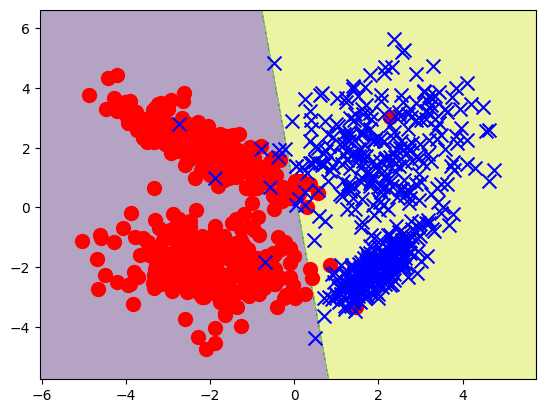

In [7]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])
Z = clf.predict(XX)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

# Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

При альфа =  0.0001


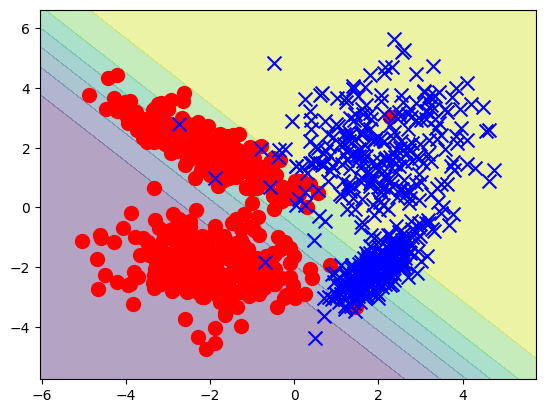

При альфа =  0.01


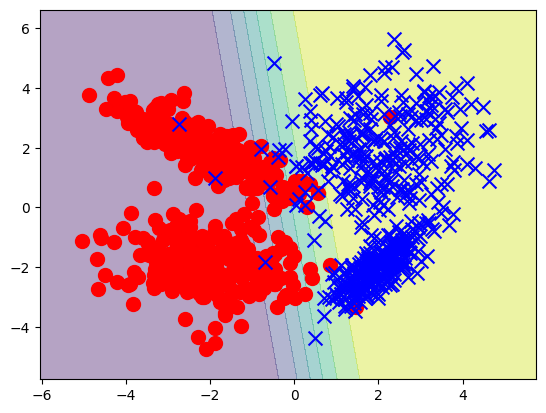

При альфа =  0.5


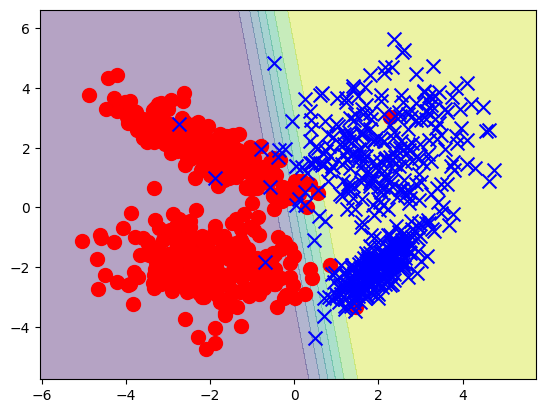

При альфа =  10


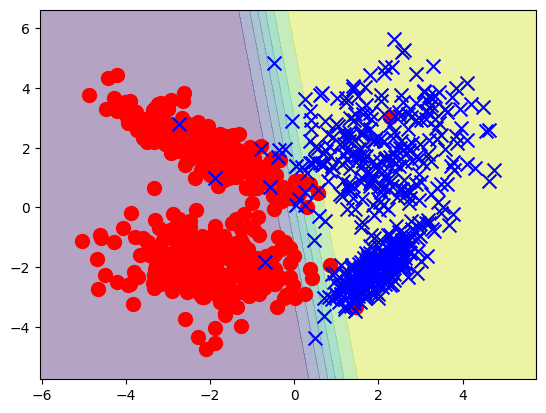

In [8]:
for alpha in [0.0001, 0.01, 0.5, 10]:
  print('При альфа = ', alpha)
  X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)
  logreg = LogReg(alpha)
  X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
  logreg.fit(X, y)
  xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
  XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
  XX = np.array([(1, *xx) for xx in XX])
  Z = logreg.predict_proba(XX)
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.4)
  plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
  plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)
  plt.show()

# Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [9]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [10]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self.sigmoid(X, self.b)

    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [11]:
logreg = LogReg()
logreg.fit(X, y)
y_pred = logreg.predict(X)
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


# Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

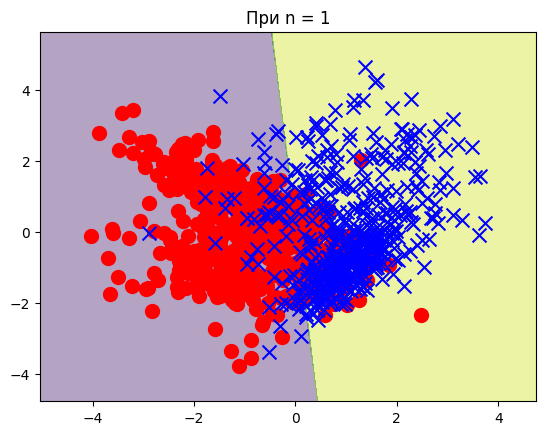

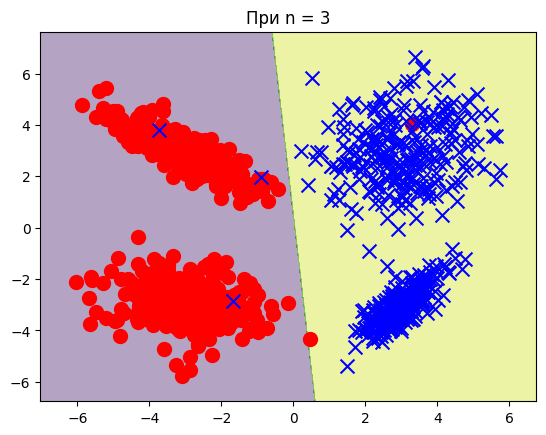

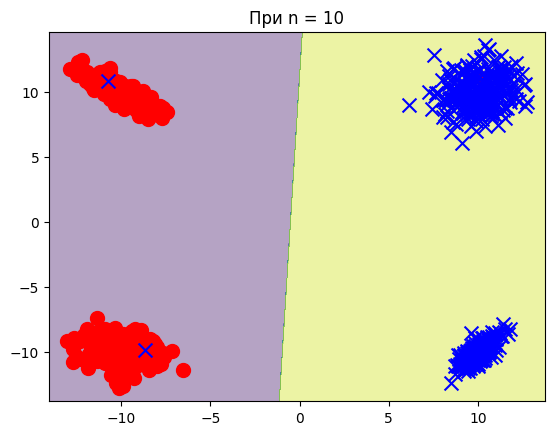

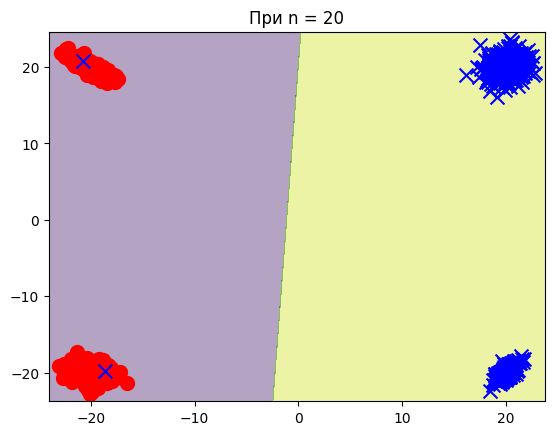

In [12]:
def vis(n):
  X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=n,
                          random_state=1)
  X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
  clf = LogisticRegression(random_state=0).fit(X, y)
  xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
  XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
  XX = np.array([(1, *xx) for xx in XX])
  Z = clf.predict(XX)
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.4)
  plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
  plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)
  plt.title(f'При n = {n}')
  plt.show()
for x in [1, 3, 10, 20]:
  vis(x)

# Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [13]:
X,y = make_classification (n_samples=1000,
                          n_features=10,
                          n_informative=10,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)

In [14]:
logreg = LogReg()
logreg.fit(X, y)
y_pred = logreg.predict(X)
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.99 F1-score = 0.99


# Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.

In [15]:
X,y = make_classification (n_samples=1000,
                          n_features=20,
                          n_informative=10,
                          n_redundant=0,
                          n_classes=8,
                          class_sep=2,
                          random_state=1)

In [16]:
class MultiClassLogReg:
    def __init__(self, n_classes, alpha=0.5, n_iters=1000):
        self.models = []
        self.n_classes = n_classes
        self.alpha = alpha
        self.n_iters = n_iters

    def fit(self, X, y):
        for i in range(self.n_classes):
            binary_labels = (y == i).astype(int)
            model = LogReg(alpha=self.alpha, n_iters=self.n_iters)
            model.fit(X, binary_labels)
            self.models.append(model)

    def predict(self, X_test):
        predictions = np.zeros((X_test.shape[0], self.n_classes))
        for i in range(self.n_classes):
            predictions[:, i] = self.models[i].predict_proba(X_test)
        final_predictions = np.argmax(predictions, axis=1)
        return final_predictions

n_classes = len(np.unique(y))
model = MultiClassLogReg(n_classes=n_classes, alpha=0.1, n_iters=1000)
model.fit(X, y)

y_pred = model.predict(X)

accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.779


Решение с помощью библиотеки

In [17]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X, y)

y_pred = model.predict(X)

accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.797


# Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression

In [19]:
probabilities = model.predict_proba(X)

# Выводим вероятности для первых 5 объектов
print("Вероятности для первых 5 объектов:")
print(probabilities[:5, :])

Вероятности для первых 5 объектов:
[[9.03534369e-05 2.41201846e-02 4.60728481e-04 3.39962897e-03
  8.09717823e-01 1.58705035e-01 1.68920219e-03 1.81704380e-03]
 [5.47763866e-05 1.06776002e-05 4.54104248e-06 3.63916298e-04
  9.07580405e-04 4.47945702e-01 5.50083545e-01 6.29261604e-04]
 [6.46370683e-02 4.60991375e-01 1.38878199e-04 6.85480744e-02
  3.83570349e-02 1.14668889e-06 9.71916749e-02 2.70134747e-01]
 [4.75511134e-03 2.69469322e-02 2.59867121e-08 3.06465344e-01
  4.54192068e-03 4.53048372e-06 6.53037271e-01 4.24886376e-03]
 [3.27228338e-02 2.65131189e-01 5.68998719e-07 1.91114989e-01
  4.73309239e-01 7.13926173e-05 4.47231913e-03 3.31774680e-02]]
